In [2]:
#logistic regression 
#TheEarlierTheBetter

#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler



In [3]:
#uploading the data

data = pd.read_csv("/Users/cmoradajr/Downloads/The_Cancer_data_1500_V2.csv")
data.head(5)

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
#Descriptive Statistics

print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [5]:
#checking the data correlation

data_corr = data.corr()
print(data_corr)

                       Age    Gender       BMI   Smoking  GeneticRisk  \
Age               1.000000  0.007145  0.030246 -0.013914    -0.027025   
Gender            0.007145  1.000000 -0.012516  0.035384    -0.004674   
BMI               0.030246 -0.012516  1.000000 -0.012616     0.011392   
Smoking          -0.013914  0.035384 -0.012616  1.000000    -0.021039   
GeneticRisk      -0.027025 -0.004674  0.011392 -0.021039     1.000000   
PhysicalActivity  0.016396  0.023401  0.011480 -0.043817    -0.039721   
AlcoholIntake     0.003209  0.009723  0.004711 -0.001660    -0.016864   
CancerHistory    -0.010996  0.007657 -0.010824  0.016368    -0.010833   
Diagnosis         0.196603  0.250336  0.187560  0.226999     0.253472   

                  PhysicalActivity  AlcoholIntake  CancerHistory  Diagnosis  
Age                       0.016396       0.003209      -0.010996   0.196603  
Gender                    0.023401       0.009723       0.007657   0.250336  
BMI                       0.011480 

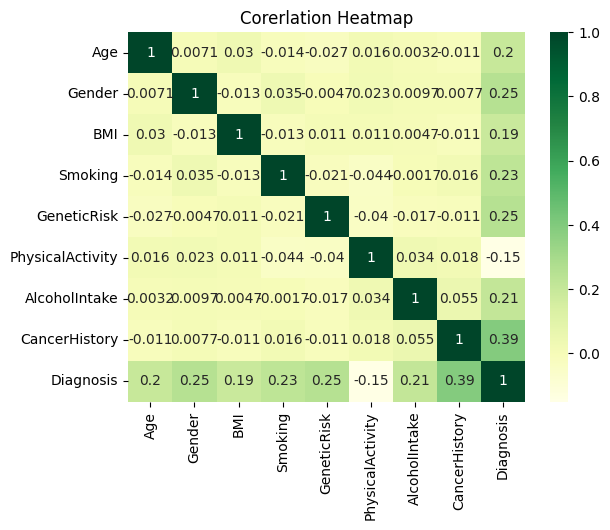

In [ ]:
#visualizing the correlation using heatmap

ß



In [8]:
#Assigning the variables

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [9]:
#splitting the dataset to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state= 45)

In [10]:
#feature scaling 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
#training the model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [12]:
#predicting and evaluating the results

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("✅ Accuracy:", round(accuracy * 100, 2), "%")
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📄 Classification Report:\n", report)

✅ Accuracy: 85.67 %

📊 Confusion Matrix:
 [[180  17]
 [ 26  77]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       197
           1       0.82      0.75      0.78       103

    accuracy                           0.86       300
   macro avg       0.85      0.83      0.84       300
weighted avg       0.86      0.86      0.85       300



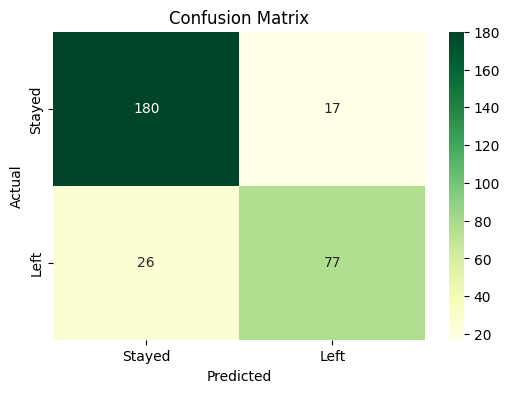

In [15]:

#visualizing the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGn', 
            xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

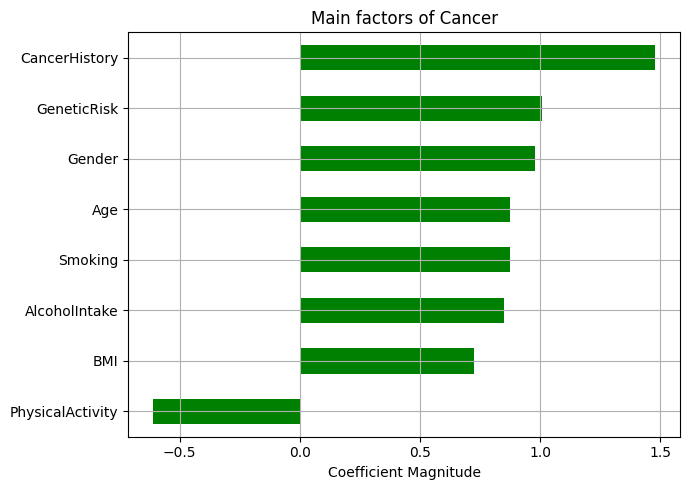

In [18]:

#Feature importance plot
coefficients = pd.Series(model.coef_[0], index=X.columns)
top_features = coefficients.reindex(coefficients.abs().sort_values(ascending=False).head(50).index)

plt.figure(figsize=(7, 5))
top_features.sort_values().plot(kind='barh', color='green')
plt.title("Main factors of Cancer")
plt.xlabel("Coefficient Magnitude")
plt.grid(True)
plt.tight_layout()
plt.show()